<a href="https://colab.research.google.com/github/JPengine/Code_Practice/blob/main/Corporate_Bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels import api
from statsmodels.stats.diagnostic import acorr_ljungbox as LB

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import scipy.special as sp
from statsmodels import api
from scipy.stats import laplace_asymmetric
from google.colab import files
import seaborn as sns
from scipy import stats
import scipy.stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Application
from google.colab import files
uploaded=files.upload()

Saving zero_coupon0805.csv to zero_coupon0805.csv


In [5]:
import io
#df=pd.read_csv(io.BytesIO(uploaded['corporate.csv']))
zero=pd.read_csv(io.BytesIO(uploaded['zero_coupon0805.csv']))
#HV=df['sprd_h']/df['VIXCLS']  #High  / VIX
#IV=df['sprd_i']/df['VIXCLS']


In [ ]:
df.iloc[:,1]

,Date,sprd_h,sprd_i,VIXCLS,return_h,return_i,Bill
0,1/1/1997,3.04,0.61,19.473333,307.09,848.74,5.15
1,2/1/1997,2.73,0.59,20.139474,311.82,850.91,5.22
2,3/1/1997,2.84,0.57,20.170000,307.53,840.28,5.35
3,4/1/1997,2.94,0.59,19.662273,311.47,853.87,5.28
4,5/1/1997,2.68,0.61,19.924762,318.03,861.69,4.96
...,...,...,...,...,...,...,...
315,4/1/2023,4.53,1.41,17.817895,1467.85,3117.20,5.10
316,5/1/2023,4.69,1.42,17.636087,1453.91,3075.79,5.52
317,6/1/2023,4.05,1.30,14.003182,1477.58,3084.54,5.43
318,7/1/2023,3.79,1.19,13.932381,1498.62,3097.91,5.55


In [ ]:
# Min max mean median stdev skew excess
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

def summary(arr):
    total = []

    for col in arr.columns:
        if pd.api.types.is_numeric_dtype(arr[col]):
            sk = np.round(skew(arr[col]), 2)    #only numeric
            kur = np.round(kurtosis(arr[col]), 2)
            stat = np.round(arr[col].describe(), 2)
            result = {
                'Column': col,
                'Skewness': sk,
                'Kurtosis': kur,
                'Summary Statistics': stat
            }
            total.append(result)

    return total

summary(df)

[{'Column': 'sprd_h',
  'Skewness': 2.4,
  'Kurtosis': 8.5,
  'Summary Statistics': count    320.00
  mean       5.42
  std        2.53
  min        2.46
  25%        3.73
  50%        4.76
  75%        6.43
  max       19.88
  Name: sprd_h, dtype: float64},
 {'Column': 'sprd_i',
  'Skewness': 3.22,
  'Kurtosis': 13.56,
  'Summary Statistics': count    320.00
  mean       1.52
  std        0.83
  min        0.54
  25%        1.03
  50%        1.35
  75%        1.69
  max        6.41
  Name: sprd_i, dtype: float64},
 {'Column': 'VIXCLS',
  'Skewness': 1.85,
  'Kurtosis': 5.77,
  'Summary Statistics': count    320.00
  mean      20.57
  std        7.98
  min       10.13
  25%       14.56
  50%       19.45
  75%       24.32
  max       62.67
  Name: VIXCLS, dtype: float64},
 {'Column': 'return_h',
  'Skewness': 0.37,
  'Kurtosis': -1.31,
  'Summary Statistics': count     320.00
  mean      809.98
  std       406.28
  min       307.09
  25%       417.61
  50%       717.74
  75%      1178.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

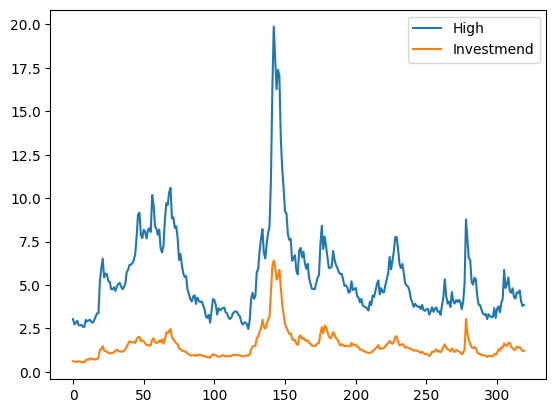

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

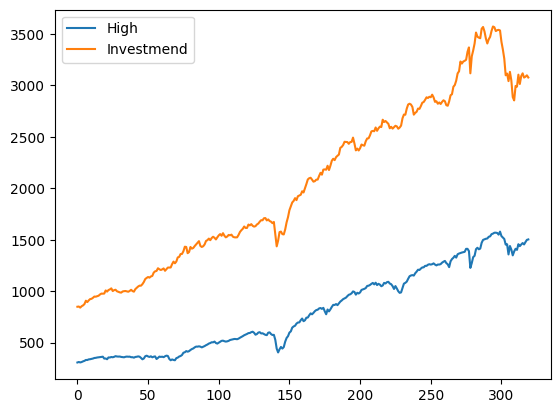

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

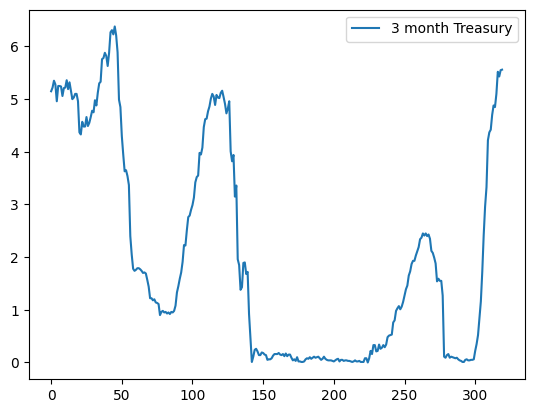

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

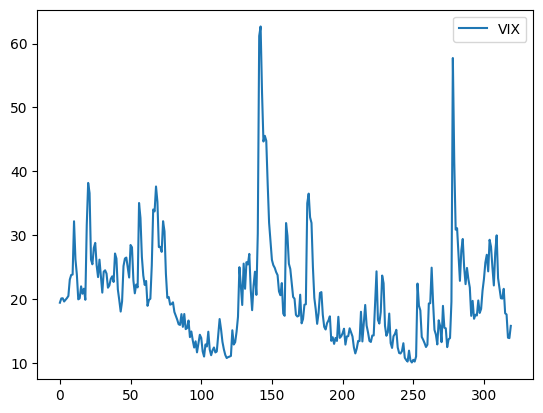

In [ ]:
# plots
plt.plot(df['sprd_h'])
plt.plot(df['sprd_i'])
plt.legend(["High", "Investmend"])
plt.savefig("spread.png")
files.download("spread.png")
plt.show()

plt.plot(df['return_h'])
plt.plot(df['return_i'])
plt.legend(["High", "Investmend"])
plt.savefig("return.png")
files.download("return.png")
plt.show()

plt.plot(df['Bill'])
plt.legend(["3 month Treasury"])
plt.savefig("bill.png")
files.download("bill.png")
plt.show()

plt.plot(df['VIXCLS'])
plt.legend(["VIX"])
plt.savefig("vix.png")
files.download("vix.png")
plt.show()


In [ ]:
# Fit AR(1) and investigate the Gaussian assumption : High Yield

DF=pd.DataFrame({'const': 1, 'x': HV[:-1].reset_index(drop=True)})
Reg = api.OLS(HV[1:].reset_index(drop=True),DF).fit()
print(Reg.summary())

residuals = Reg.resid
print('Residuals stderr = ', np.std(residuals))
print('Normality testing for residuals')
print('Shapiro-Wilk p = ', stats.shapiro(residuals)[1])
print('Jarque-Bera p = ', stats.jarque_bera(residuals)[1])
qqplot(residuals, line = 's')
plt.title('Residuals Normalized Spread AR(1)')
plt.show()
plot_acf(residuals)
plt.title('Residuals Normalized Spread AR(1)')
plt.show()
plot_acf(abs(residuals))
plt.title('AResiduals Normalized Spread AR(1)')
plt.show()

In [ ]:
# Fit AR(1) and investigate the Gaussian assumption : Investment
DF=pd.DataFrame({'const': 1, 'x': IV[:-1].reset_index(drop=True)})
Reg = api.OLS(IV[1:].reset_index(drop=True),DF).fit()
Reg.summary()

residuals = Reg.resid
print('Residuals stderr = ', np.std(residuals))
print('Normality testing for residuals')
print('Shapiro-Wilk p = ', stats.shapiro(residuals)[1])
print('Jarque-Bera p = ', stats.jarque_bera(residuals)[1])
qqplot(residuals, line = 's')
plt.title('Residuals Normalized Spread AR(1)')
plt.show()
plot_acf(residuals)
plt.title('Residuals Normalized Spread AR(1)')
plt.show()
plot_acf(abs(residuals))
plt.title('AResiduals Normalized Spread AR(1)')
plt.show()

Shapiro-Wilk p =  6.014748181421014e-20
Shapiro-Wilk p =  0.0016483553918078542
Shapiro-Wilk p =  1.143160662519386e-23
Shapiro-Wilk p =  0.1541847288608551


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

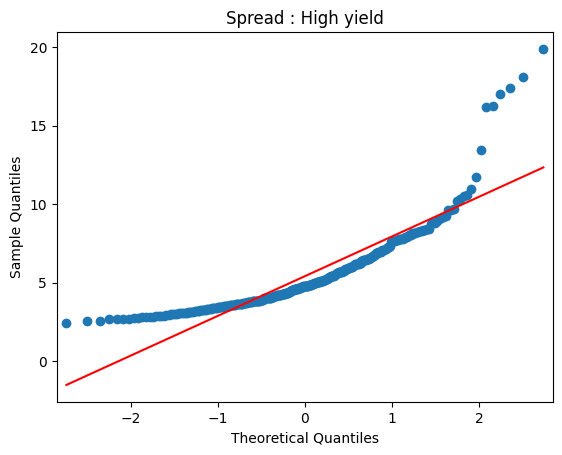

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

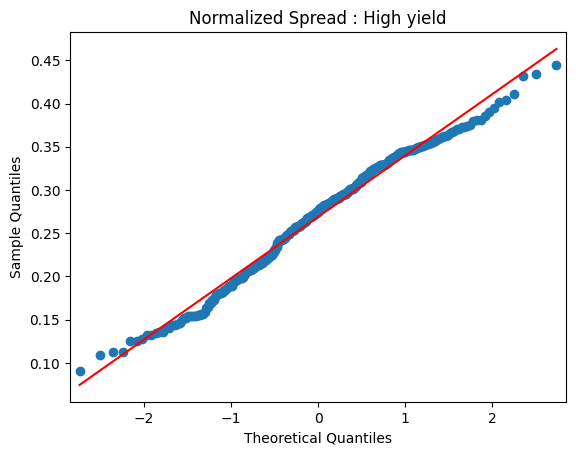

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

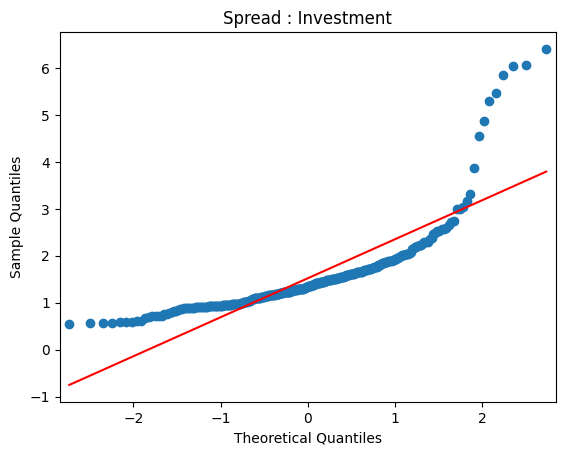

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

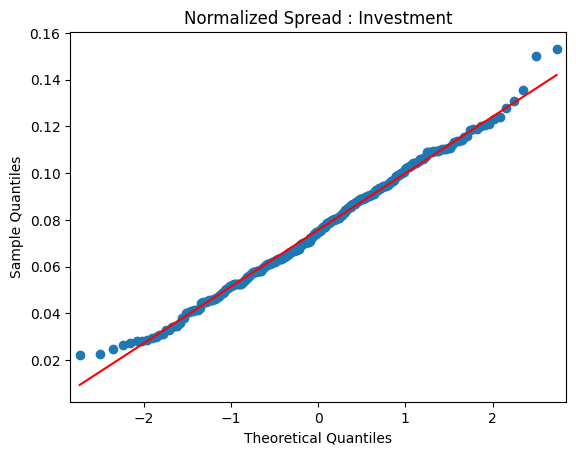

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

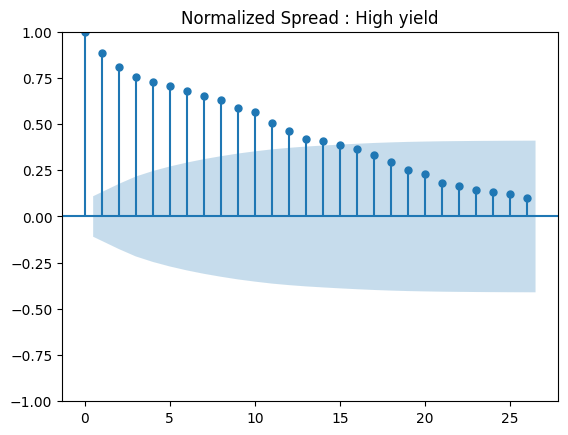

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

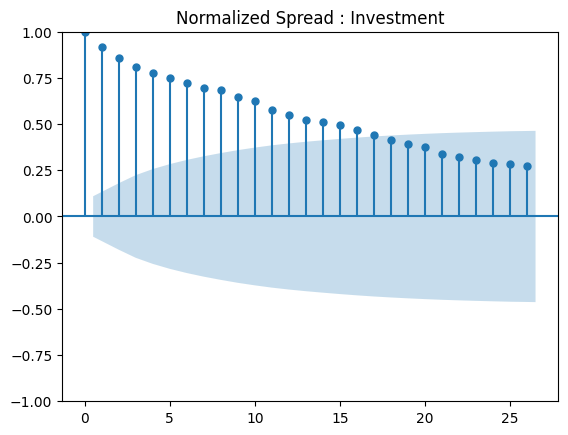

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

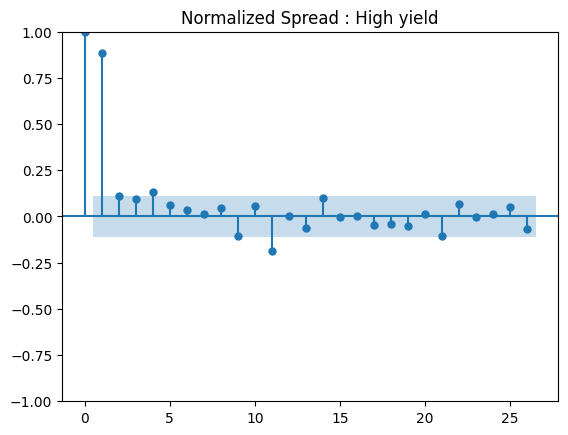

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

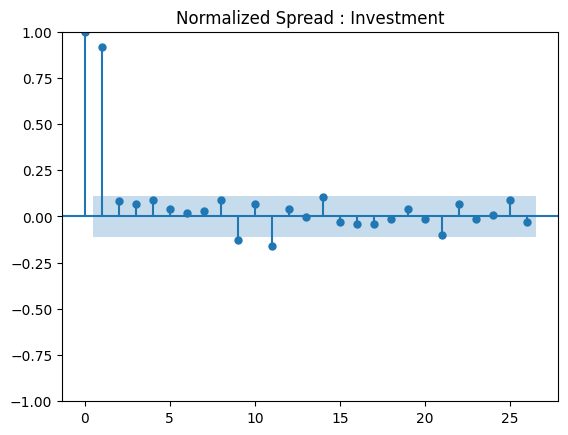

In [ ]:
# Spread Analysis
# HV and IV

#Shapiro W test
print('Shapiro-Wilk p = ', stats.shapiro(df['sprd_h'])[1])
print('Shapiro-Wilk p = ', stats.shapiro(HV)[1])
print('Shapiro-Wilk p = ', stats.shapiro(df['sprd_i'])[1])
print('Shapiro-Wilk p = ', stats.shapiro(IV)[1])

#QQ plot
qqplot(df['sprd_h'], line = 's')
plt.title("Spread : High yield")
plt.savefig("sprd1.png")
files.download("sprd1.png")
plt.show()

qqplot(HV, line = 's')
plt.title("Normalized Spread : High yield")
plt.savefig("sprd2.png")
files.download("sprd2.png")
plt.show()

qqplot(df['sprd_i'], line = 's')
plt.title("Spread : Investment")
plt.savefig("sprd3.png")
files.download("sprd3.png")
plt.show()

qqplot(IV, line = 's')
plt.title("Normalized Spread : Investment")
plt.savefig("sprd4.png")
files.download("sprd4.png")
plt.show()

#ACF
plot_acf(HV)
plt.title('Normalized Spread : High yield')
plt.savefig("acf1.png")
files.download("acf1.png")
plt.show()

plot_acf(IV)
plt.title('Normalized Spread : Investment')
plt.savefig("acf2.png")
files.download("acf2.png")
plt.show()

#PACF
plot_pacf(HV)
plt.title('Normalized Spread : High yield')
plt.savefig("pacf1.png")
files.download("pacf1.png")
plt.show()

plot_pacf(IV)
plt.title('Normalized Spread : Investment')
plt.savefig("pacf2.png")
files.download("pacf2.png")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     19.60
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.32e-05
Time:                        22:18:55   Log-Likelihood:                 643.16
No. Observations:                 319   AIC:                            -1282.
Df Residuals:                     317   BIC:                            -1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.007      4.318      0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

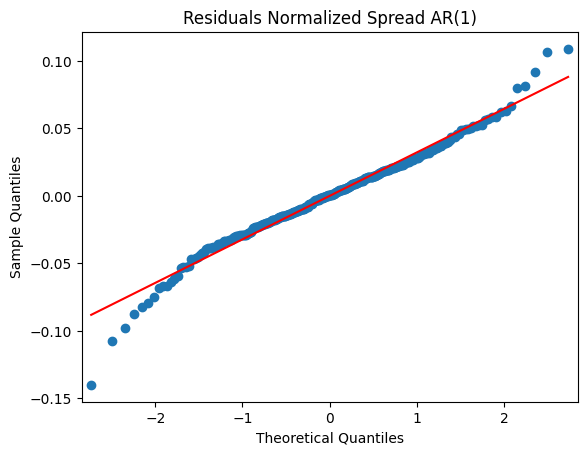

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

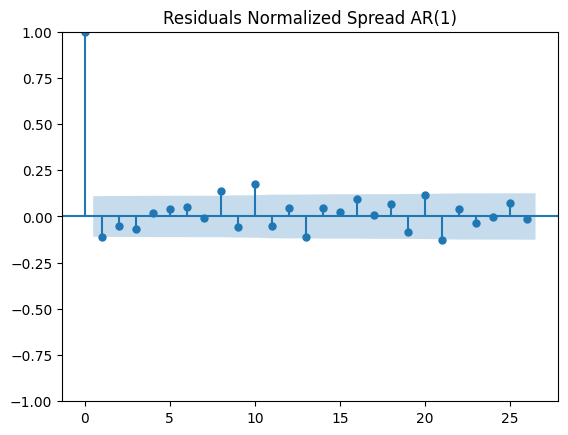

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

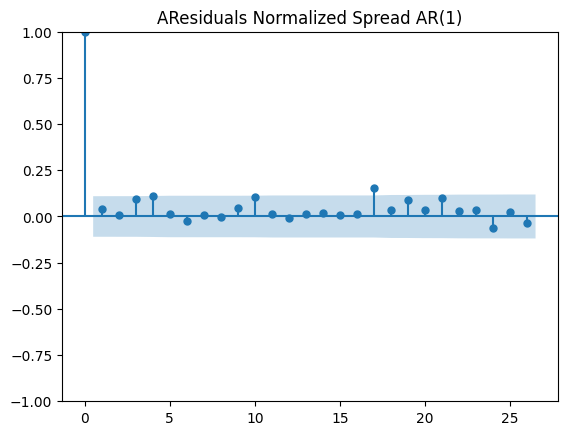

In [ ]:
# Q(t)-Q(t-1)= a+bQ(t-1)+W(t)  High yield (normalized)

DF = pd.DataFrame({'const': 1, 'x': HV[:-1]})
Reg = api.OLS(np.diff(HV), DF).fit()
print(Reg.summary())
residuals = Reg.resid
print('Residuals stderr = ', np.std(residuals))
print('Normality testing for residuals')
print('Shapiro-Wilk p = ', stats.shapiro(residuals)[1])
print('Jarque-Bera p = ', stats.jarque_bera(residuals)[1])

qqplot(residuals, line = 's')
plt.title('Residuals Normalized Spread AR(1)')
plt.savefig("qq3.png")
files.download("qq3.png")
plt.show()

plot_acf(residuals)
plt.title('Residuals Normalized Spread AR(1)')
plt.savefig("acf3.png")
files.download("acf3.png")
plt.show()

plot_acf(abs(residuals))
plt.title('AResiduals Normalized Spread AR(1)')
plt.savefig("aacf3.png")
files.download("aacf3.png")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     14.35
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           0.000182
Time:                        22:19:15   Log-Likelihood:                 1041.4
No. Observations:                 319   AIC:                            -2079.
Df Residuals:                     317   BIC:                            -2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.002      3.691      0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

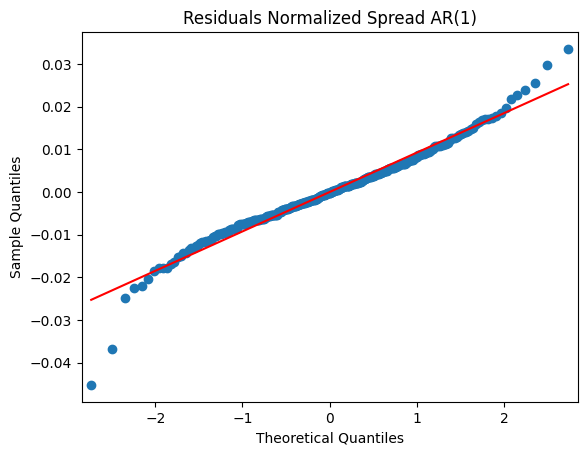

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

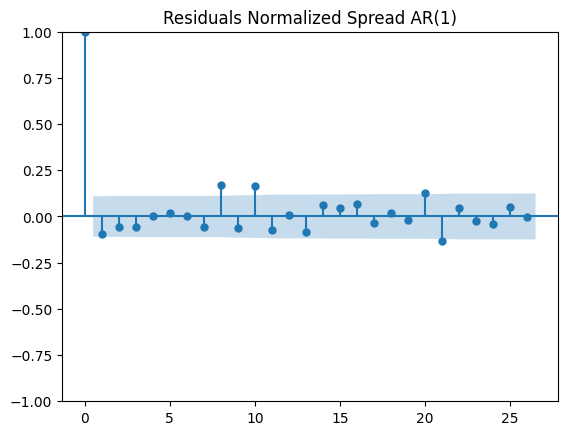

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

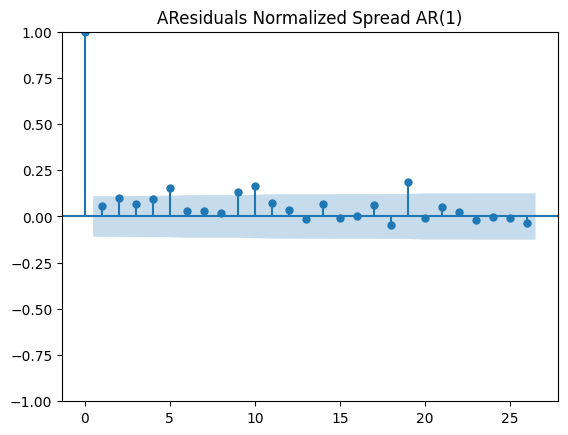

In [ ]:
# Q(t)-Q(t-1)= a+bQ(t-1)+W(t)  Investment (normalized)

DF = pd.DataFrame({'const': 1, 'x': IV[:-1]})
Reg = api.OLS(np.diff(IV), DF).fit()
print(Reg.summary())
residuals = Reg.resid
print('Residuals stderr = ', np.std(residuals))
print('Normality testing for residuals')
print('Shapiro-Wilk p = ', stats.shapiro(residuals)[1])
print('Jarque-Bera p = ', stats.jarque_bera(residuals)[1])\

qqplot(residuals, line = 's')
plt.title('Residuals Normalized Spread AR(1)')
plt.savefig("qq4.png")
files.download("qq4.png")
plt.show()

plot_acf(residuals)
plt.title('Residuals Normalized Spread AR(1)')
plt.savefig("acf4.png")
files.download("acf4.png")
plt.show()

plot_acf(abs(residuals))
plt.title('AResiduals Normalized Spread AR(1)')
plt.savefig("aacf4.png")
files.download("aacf4.png")
plt.show()

In [ ]:
print(np.mean(HV))
print(np.std(HV))

0.2688190392873898
0.07106367494860509


        month     10Y      9Y      8Y      7Y      6Y      5Y      4Y      3Y  \
0    1/1/1990  8.4146  8.3750  8.3396  8.3098  8.2872  8.2723  8.0228  8.2490   
1    2/1/1990  8.4827  8.4449  8.4113  8.3835  8.3628  8.3493  8.3025  8.3229   
2    3/1/1990  8.5649  8.5398  8.5214  8.5117  8.5122  8.5227  8.4851  8.5430   
3    4/1/1990  8.9420  8.9226  8.9098  8.9052  8.9093  8.9200  8.6503  8.9102   
4    5/1/1990  8.5728  8.5362  8.5037  8.4769  8.4567  8.4426  8.6029  8.4063   
..        ...     ...     ...     ...     ...     ...     ...     ...     ...   
398  3/1/2023  3.5812  3.5336  3.5012  3.4901  3.5082  3.5665  3.9455  3.8614   
399  4/1/2023  3.5249  3.4719  3.4335  3.4158  3.4279  3.4822  3.5955  3.7952   
400  5/1/2023  3.7060  3.6653  3.6413  3.6410  3.6736  3.7520  3.6664  4.1207   
401  6/1/2023  3.8352  3.8253  3.8381  3.8810  3.9635  4.0964  4.0804  4.5535   
402  7/1/2023  3.9418  3.9261  3.9316  3.9654  4.0366  4.1559  4.2800  4.5816   

         2Y      1Y    3M  

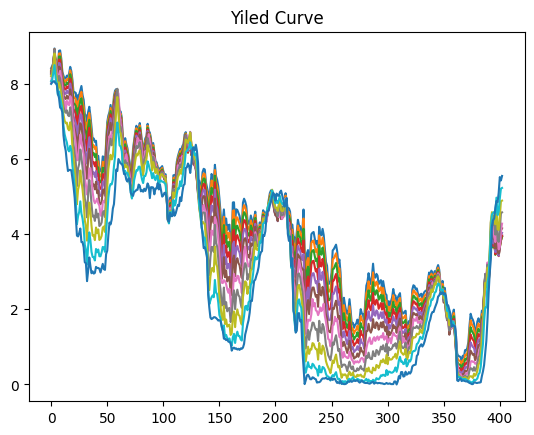

In [9]:
print(zero)

for i in range(1,11+1):
    plt.plot(zero.iloc[:,i])
    plt.title('Yiled Curve')


          date       PC1       PC2       PC3
0   1990-01-31  6.578948  0.291603 -0.118301
1   1990-02-28  6.710068  0.290306 -0.073408
2   1990-03-31  6.935570  0.346476 -0.048567
3   1990-04-30  7.434571  0.250360 -0.043020
4   1990-05-31  6.863190  0.276560 -0.024735
..         ...       ...       ...       ...
398 2023-03-31 -0.039785  1.099452 -0.098727
399 2023-04-30 -0.154414  1.135499 -0.195986
400 2023-05-31  0.196788  1.196234 -0.226914
401 2023-06-30  0.614107  1.289129 -0.126178
402 2023-07-31  0.730512  1.247510 -0.110837

[403 rows x 4 columns]
The percentage of variance [9.694e+01 2.980e+00 5.000e-02]


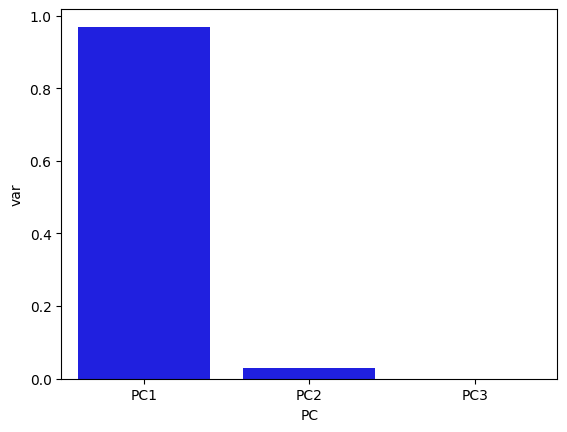

In [12]:
#Extract PC1 and PC2
Month=pd.DataFrame({'date':pd.date_range('1990-01', '2023-08', freq='M')})  # Generate Month
features=['10Y', '9Y', '8Y', '7Y', '6Y', '5Y', '4Y', '3Y', '2Y', '1Y']

x=zero.loc[:,features].values  # only values
scaler = StandardScaler()
scaler.fit(x)
S = scaler.transform(x)

pca=PCA(n_components=3)
Snew=pca.fit_transform(S) # project the original data into the PCA space

principalDf = pd.DataFrame(data=Snew, columns = ['PC1','PC2','PC3'])
PCA=pd.concat([Month, principalDf], axis = 1)
print(PCA)
print('The percentage of variance',np.round(100*pca.explained_variance_ratio_,2)) # in %
dff = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var",
           data=dff, color="b");


In [14]:
def ARfit(arr):
  DF=pd.DataFrame({'const': 1, 'x': arr[:-1].reset_index(drop=True)})
  Reg = api.OLS(arr[1:].reset_index(drop=True),DF).fit()
  print(Reg.summary())

  residuals = Reg.resid
  print('Residuals stderr = ', np.std(residuals))
  print('Normality testing for residuals')
  print('Shapiro-Wilk p = ', stats.shapiro(residuals)[1])
  print('Jarque-Bera p = ', stats.jarque_bera(residuals)[1])

  qqplot(residuals, line = 's')
  plt.title('Residuals Normalized Spread AR(1)')
  plt.show()
  plot_acf(residuals)
  plt.title('Residuals Normalized Spread AR(1)')
  plt.show()
  plot_acf(abs(residuals))
  plt.title('AResiduals Normalized Spread AR(1)')
  plt.show()

                            OLS Regression Results                            
Dep. Variable:                    PC1   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.164e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:58   Log-Likelihood:                -144.23
No. Observations:                 402   AIC:                             292.5
Df Residuals:                     400   BIC:                             300.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.017     -0.841      0.4

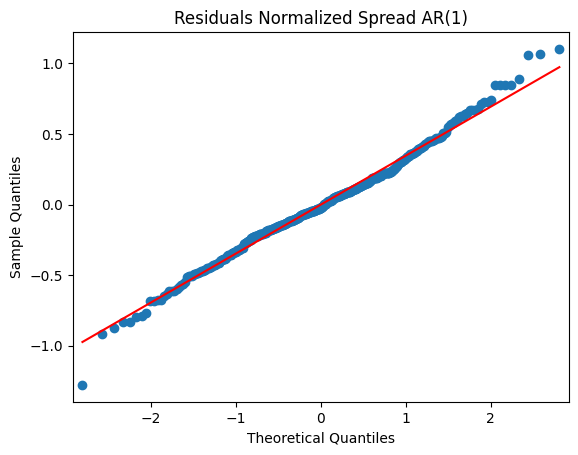

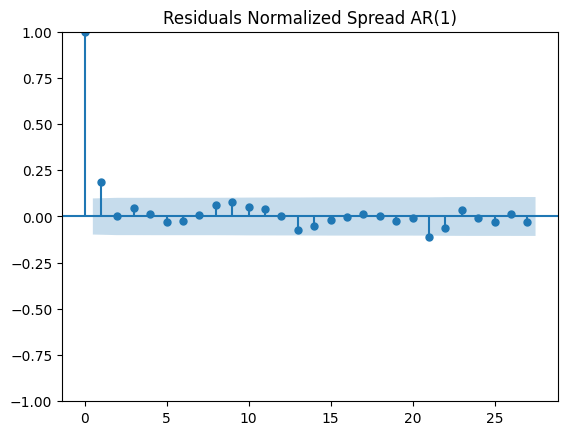

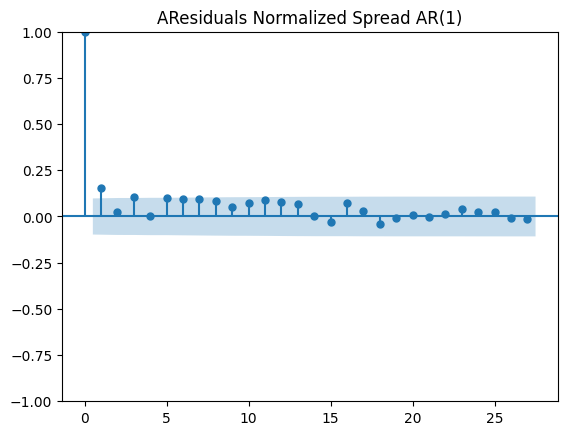

In [17]:
ARfit(PCA['PC1'])

                            OLS Regression Results                            
Dep. Variable:                    PC2   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     9789.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          2.48e-283
Time:                        18:48:21   Log-Likelihood:                 323.51
No. Observations:                 402   AIC:                            -643.0
Df Residuals:                     400   BIC:                            -635.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.005      0.432      0.6

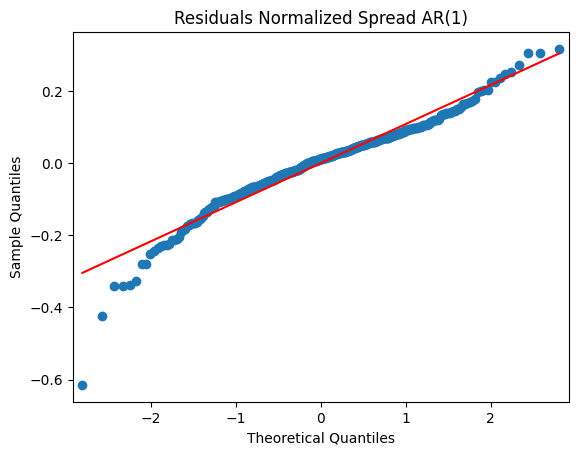

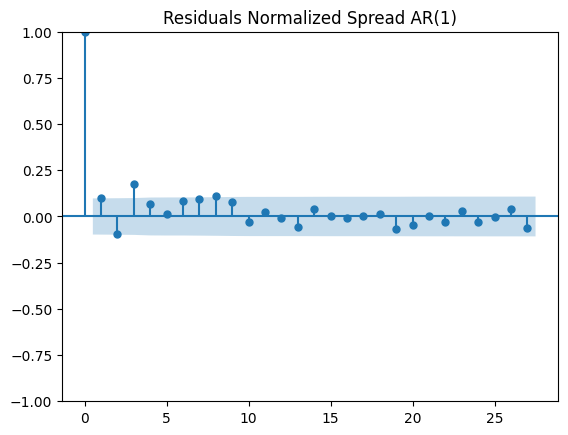

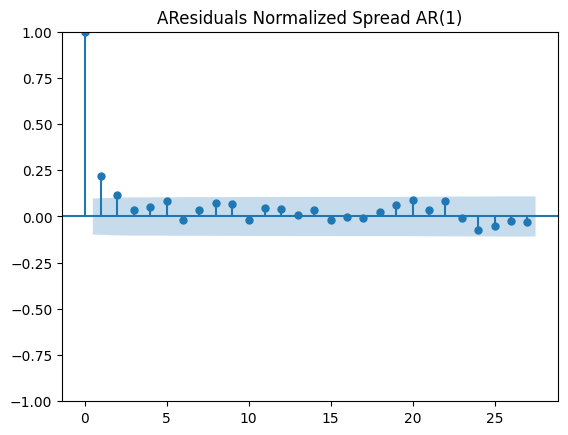

In [18]:
ARfit(PCA['PC2'])

                            OLS Regression Results                            
Dep. Variable:                    PC3   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1431.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          3.48e-134
Time:                        18:48:26   Log-Likelihood:                 798.20
No. Observations:                 402   AIC:                            -1592.
Df Residuals:                     400   BIC:                            -1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.064e-05      0.002      0.030      0.9

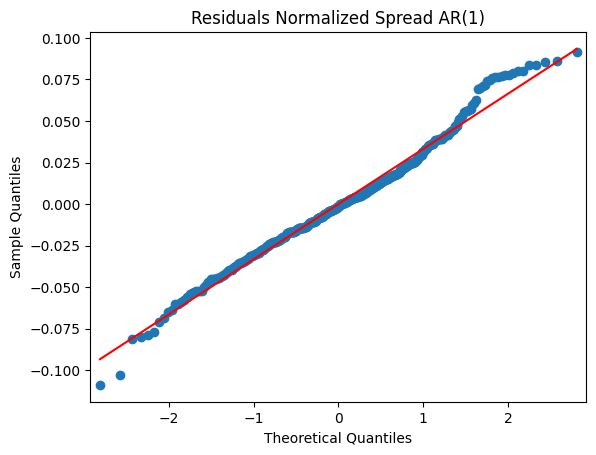

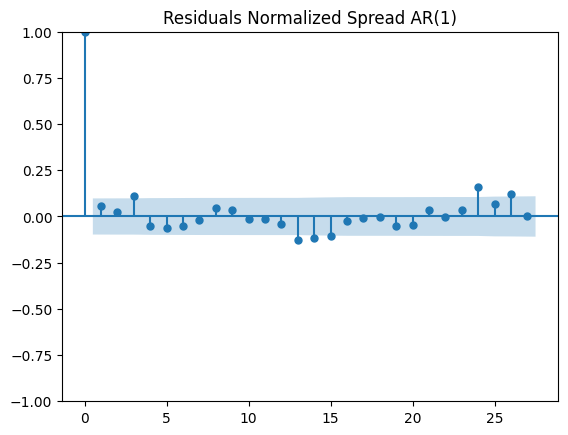

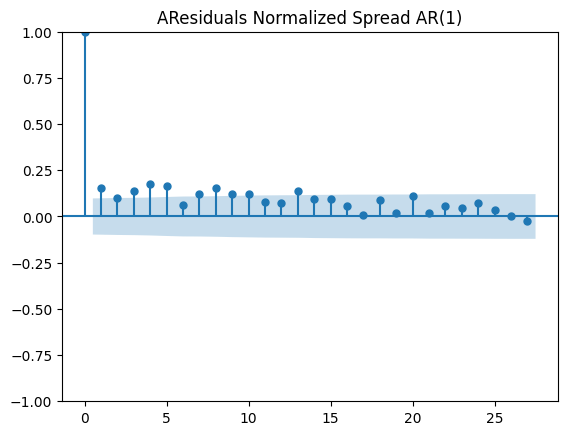

In [19]:
# @title
ARfit(PCA['PC3'])